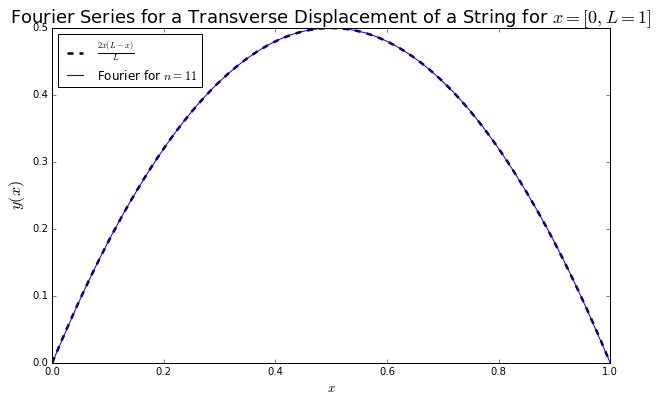

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes as zoom
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import pylab

def main_1(n):
    """main program"""
    def c_n1(n):
            """Finds constants for n terms in part (a)"""
            L=1
            #return (16*L) / (np.pi*n)
            return (8*(1-(-1)**n)*L) / ((np.pi**3)*(n**3)) 
            
    def f_n1(n, func):
            """function values using constant c_n values"""
            L=1
            n_steps = 1000
            y = np.zeros((n_steps))
            x = np.linspace(0, L, n_steps)
            #print(x) # for testing

            for j in range(len(x)):
                sum0 = 0
                for i in range(1, n+1): # 1 to n
                    k_n = np.pi*i / L
                    sum0 += np.sin(k_n*x[j])*func(i)
                y[j] = sum0

            return y, x
    
    y, x = f_n1(n, c_n1)
    return y, x, n

    
def part_a():
    """executes all functions for part (a)"""
    L=1
    fig1 = plt.figure()
    plt.title(r"Fourier Series for a Transverse Displacement of a String for $x=[0,L=1]$", 
              fontsize="18")
    
    # resizing graph
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 10
    fig_size[1] = 6
    plt.rcParams["figure.figsize"] = fig_size

    # assigning variables
    y, x, n = main_1(11)
    
    actual_y = np.zeros_like(x)
    
    # actual y values
    for j in range(len(x)):
        i = (2*x[j]*(L-x[j])) / L
        actual_y[j] = i
     
    ax1 = fig1.add_subplot(111)
    ax1.plot(x, actual_y, 'k--', linewidth="2.5", label=r"$\frac{2x(L-x)}{L}$")
    ax1.plot(x, y, 'b', label=r"Fourier for $n={0}$".format(n))
    ax1.legend(loc=2)
    plt.xlabel(r"$x$", fontsize="13")
    plt.ylabel(r"$y(x)$", fontsize="16")
    
    # save figure
    pylab.savefig('4_7_part_a_plot.png')
    
if __name__ == '__main__':
    part_a()